In [ ]:
!pip install mlrose
!pip install geocoder
!pip install folium
!pip install streamlit
!pip install typeguard

In [52]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import plotly.express as px
from geopy.geocoders import Nominatim
from geopy import distance
from itertools import combinations
import warnings
warnings.filterwarnings("ignore")

First, demonstrate with a simple example of arbitrary points. Optimize the route using the genetic algorithm (mlrose).

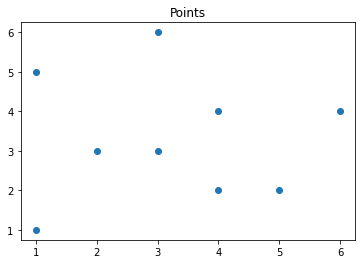

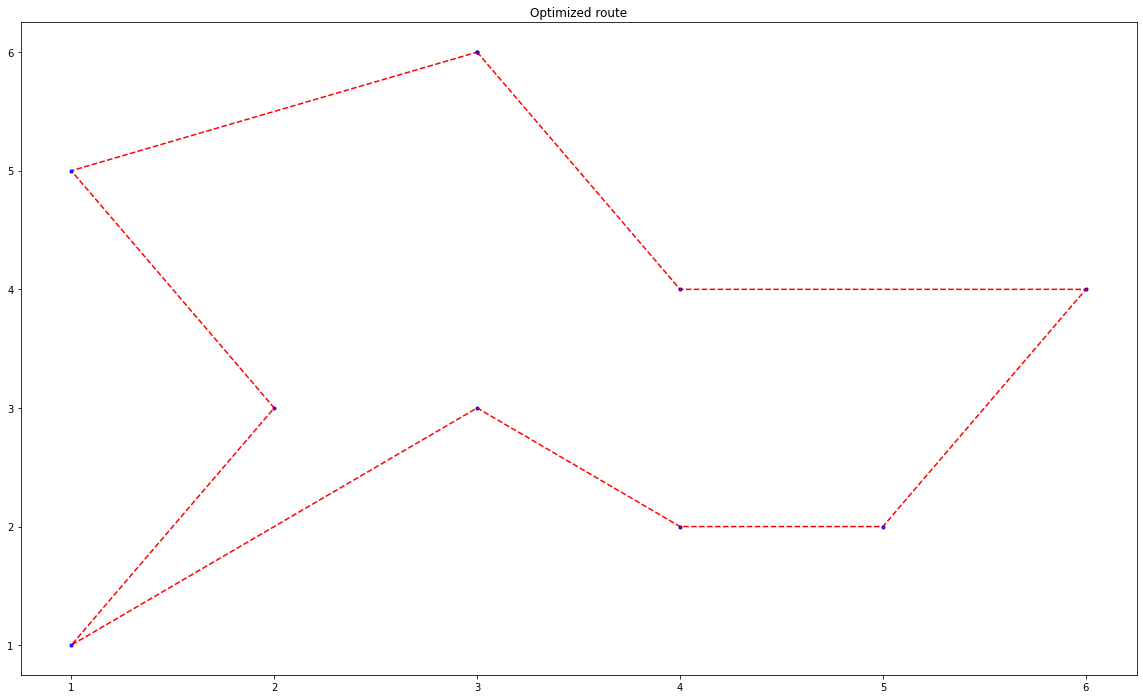

In [16]:
# Create list of city coordinates
coords_list = [(1, 1), (4, 2), (5, 2), (6, 4), (4, 4), (3, 6), (1, 5), (2, 3), (3,3)]

xs = [x[0] for x in coords_list]
ys = [x[1] for x in coords_list]
plt.scatter(xs, ys)
plt.title('Points')
plt.show()
# Initialize fitness function object using coords_list
fitness_coords = mlrose.TravellingSales(coords = coords_list)
problem_fit = mlrose.TSPOpt(length = len(coords_list), fitness_fn = fitness_coords, maximize=False)

best_state, best_fitness = mlrose.genetic_alg(problem_fit, random_state = 2, mutation_prob = 0.2,max_attempts = 100)
# print(best_state)
# print(best_fitness)

optimizedlist = [coords_list[i] for i in best_state]
optimizedlist.append(optimizedlist[0])

figure(figsize = (20,12))
xsoptimized = [x[0] for x in optimizedlist]
ysoptimized = [x[1] for x in optimizedlist]
plt.plot(xsoptimized, ysoptimized,marker='.', linestyle = '--', color = 'r' ,markeredgecolor = 'b')
plt.title('Optimized route')
plt.show()

## Real Coordinates

Next, apply this to data from real coordinates. The following code takes a list of cities/ landmarks as location, finds their coordinates (using the geolocator package), inputs into multiple TSP optimization algorithms, and plots in plotly. 

The following pulls coordinates for cities in Western Europe.

Also, we need to calculate the distance matrix between coordinates for the TSP optimization to run. You cannot calculate lat and long using the euclidean distance because the earth is circular. Thus, calculate the distances using the combinations of each two cities (geopy package).

In [17]:
locations = ['Madrid', 'Barcelona', 'Lisbon', 'London', 'Paris', 'Amsterdam', 'Zurich', 'Dublin', 'Copenhagen']


             
geolocator = Nominatim(user_agent="Salesman Project 3")
coordinates = []
addresses = []
for location in locations:
    
    loc = geolocator.geocode(location)
    coordinates.append((loc.latitude, loc.longitude))
    addresses.append(loc.address.split(',')[0])
    print(location)
latitudes = [coordinate[0] for coordinate in coordinates]
longitudes = [coordinate[1] for coordinate in coordinates]
df = pd.DataFrame({
    'Name': addresses ,
    'Coordinates': coordinates,
    'latitude' :latitudes,
    'longitude' : longitudes

})
dist_list = []
for combination in list(combinations(df['Name'].index, 2)):
    combination = list(combination)
    index1 = combination[0]
    index2 = combination[1]
    c1 = df['Coordinates'][index1]
    c2 = df['Coordinates'][index2]
    d = distance.distance(c1,c2).miles
    combination.append(d)
    dist_list.append(combination)

Madrid
Barcelona
Lisbon
London
Paris
Amsterdam
Zurich
Dublin
Copenhagen


In [22]:
# Coordinates of each of the cities
df

,Name,Coordinates,latitude,longitude
0,Madrid,"(40.4167047, -3.7035825)",40.416705,-3.703582
1,Barcelona,"(41.3828939, 2.1774322)",41.382894,2.177432
2,Lisboa,"(38.7077507, -9.1365919)",38.707751,-9.136592
3,London,"(51.5073219, -0.1276474)",51.507322,-0.127647
4,Paris,"(48.8588897, 2.3200410217200766)",48.858890,2.320041
5,Amsterdam,"(52.3727598, 4.8936041)",52.372760,4.893604
6,Zürich,"(47.3744489, 8.5410422)",47.374449,8.541042
7,Dublin,"(53.3497645, -6.2602732)",53.349764,-6.260273
8,København,"(55.6867243, 12.5700724)",55.686724,12.570072


In [23]:
# Distance matrix
# Example: First element- the distance between Madrid and Barcelona is 314.9867373015711 miles
dist_list

[[0, 1, 314.9867373015711],
 [0, 2, 313.08468676679746],
 [0, 3, 784.8551483821667],
 [0, 4, 653.7053341563429],
 [0, 5, 920.8482292620068],
 [0, 6, 775.9092220577487],
 [0, 7, 901.3888617911332],
 [0, 8, 1289.689421603118],
 [1, 2, 627.1396367465726],
 [1, 3, 707.8204564390091],
 [1, 4, 516.3058632013157],
 [1, 5, 769.8217033589863],
 [1, 6, 519.660248837068],
 [1, 7, 915.160735368823],
 [1, 8, 1094.606090073932],
 [2, 3, 985.8318128524132],
 [2, 4, 903.2067694885977],
 [2, 5, 1159.2846352403199],
 [2, 6, 1072.6503158581088],
 [2, 7, 1020.4775555870038],
 [2, 8, 1542.3980953460805],
 [3, 4, 212.82774479390906],
 [3, 5, 222.69974630055395],
 [3, 6, 483.39917400167633],
 [3, 7, 288.6838376144146],
 [3, 8, 595.7393353896958],
 [4, 5, 267.91749152102875],
 [4, 6, 305.43530617544747],
 [4, 7, 485.0372071800614],
 [4, 8, 640.4770441980297],
 [5, 6, 381.8156531121252],
 [5, 7, 471.1624362022194],
 [5, 8, 387.2389666330184],
 [6, 7, 771.5881699132178],
 [6, 8, 600.0747949486462],
 [7, 8, 772.

Let's see the plot of these cities on a map:

In [21]:
fig = px.scatter_geo(df, lat='latitude', lon= 'longitude', text = 'Name')
fig.update_geos(fitbounds="locations")
fig.update_layout(height=500, margin={"r":0,"t":0,"l":0,"b":0})
fig.update_traces(textposition="top center",
                  mode='markers+text')
fig.show()

Now, optimize the TSP using multiple algorithms (genetic alg, hill climb, random hill climb, simulated annealing) and compare the routes/ shortest routes.

In [47]:
fitness_dists = mlrose.TravellingSales(distances = dist_list)
problem_fit = mlrose.TSPOpt(length = len(df), fitness_fn = fitness_dists, maximize=False, distances = dist_list)
best_state, ga_best_fitness = mlrose.genetic_alg(problem_fit, random_state = 2, mutation_prob = 0.2,max_attempts = 100)

ga_best_fitness = round(ga_best_fitness)
print('Length: ' + str(ga_best_fitness) + ' miles')

dfoptimized = df.reindex(best_state)

fig = px.line_geo(dfoptimized, lat='latitude', lon= 'longitude', text = 'Name')
fig.update_geos(fitbounds="locations")
fig.update_layout(height=500, margin={"r":0,"t":0,"l":0,"b":0})
fig.update_traces(textposition="top center")
fig.show()

Length: 4011 miles


In [63]:
fitness_dists = mlrose.TravellingSales(distances = dist_list)
problem_fit = mlrose.TSPOpt(length = len(df), fitness_fn = fitness_dists, maximize=False, distances = dist_list)
best_state, hc_best_fitness = mlrose.hill_climb(problem_fit, random_state = 2)

hc_best_fitness = round(hc_best_fitness)
print('Length: ' + str(hc_best_fitness) + ' miles')

dfoptimized = df.reindex(best_state)

fig = px.line_geo(dfoptimized, lat='latitude', lon= 'longitude', text = 'Name')
fig.update_geos(fitbounds="locations")
fig.update_layout(height=500, margin={"r":0,"t":0,"l":0,"b":0})
fig.update_traces(textposition="top center")
fig.show()

Length: 3925 miles


In [50]:
fitness_dists = mlrose.TravellingSales(distances = dist_list)
problem_fit = mlrose.TSPOpt(length = len(df), fitness_fn = fitness_dists, maximize=False, distances = dist_list)
best_state, rhc_best_fitness = mlrose.random_hill_climb(problem_fit, random_state = 2, 
                                             max_attempts = 100)
rhc_best_fitness = round(rhc_best_fitness)                                            
print('Length: ' + str(rhc_best_fitness) + ' miles')

dfoptimized = df.reindex(best_state)

fig = px.line_geo(dfoptimized, lat='latitude', lon= 'longitude', text = 'Name')
fig.update_geos(fitbounds="locations")
fig.update_layout(height=500, margin={"r":0,"t":0,"l":0,"b":0})
fig.update_traces(textposition="top center")
fig.show()

Length: 3969 miles


In [64]:
fitness_dists = mlrose.TravellingSales(distances = dist_list)
problem_fit = mlrose.TSPOpt(length = len(df), fitness_fn = fitness_dists, maximize=False, distances = dist_list)
best_state, sa_best_fitness = mlrose.simulated_annealing(problem_fit, random_state = 2, 
                                             max_attempts = 100)

sa_best_fitness = round(sa_best_fitness)
print('Length: ' + str(sa_best_fitness) + ' miles')

dfoptimized = df.reindex(best_state)

fig = px.line_geo(dfoptimized, lat='latitude', lon= 'longitude', text = 'Name')
fig.update_geos(fitbounds="locations")
fig.update_layout(height=500, margin={"r":0,"t":0,"l":0,"b":0})
fig.update_traces(textposition="top center")
fig.show()

Length: 3925 miles


Analyzing the results, the hill climb and simulated annealing algorithms have the shortest distances!

In [65]:
results = pd.DataFrame({
    'Algorithm': ['Genetic Algorith', 'Hill Climb', 'Random Hill Climb', 'Simulated Annealing'],
    'Distance' : [ga_best_fitness, hc_best_fitness, rhc_best_fitness, sa_best_fitness]
})
results.sort_values('Distance')

,Algorithm,Distance
1,Hill Climb,3925
3,Simulated Annealing,3925
2,Random Hill Climb,3969
0,Genetic Algorith,4011


## Steps for future work
Applying the algorithm for national parks.

Here I scrape all the national parks, and will apply TSP in the future.

In [66]:
import requests
from bs4 import BeautifulSoup

quote_page = 'https://randalolson.com/2016/07/30/the-optimal-u-s-national-parks-centennial-road-trip/'
page = requests.get(quote_page)
soup = BeautifulSoup(page.content, 'html.parser')
# print(soup.prettify())

In [149]:
parks = []
soup.find_all('li')[0].get_text()
for li in soup.find_all('li'):
    parks.append(li.get_text())

In [ ]:
# ['Grand Canyon National Park, Arizona',
#  'Petrified Forest National Park, Arizona',
#  'Saguaro National Park, Arizona',
#  'Guadalupe Mountains National Park, Texas',
#  'Carlsbad Caverns National Park, New Mexico',
#  'Big Bend National Park, Texas',
#  'Hot Springs National Park, Arkansas',
#  'Mammoth Cave National Park, Kentucky',
#  'Great Smoky Mountains National Park, Tennessee',
#  'Everglades National Park, Florida',
#  'Dry Tortugas National Park, Florida',
#  'Biscayne National Park, Florida',
#  'Congaree National Park, South Carolina',
#  'Shenandoah National Park, Virginia',
#  'Acadia National Park, Maine',
#  'Cuyahoga Valley National Park, Ohio',
#  'Isle Royale National Park, Michigan',
#  'Voyageurs National Park, Minnesota',
#  'Theodore Roosevelt National Park, North Dakota',
#  'Badlands National Park, South Dakota',
#  'Wind Cave National Park, South Dakota',
#  'Rocky Mountain National Park, Colorado',
# #  'Great Sand Dunes National Park and Preserve, Colorado',
#  'Black Canyon of the Gunnison National Park, Colorado',
#  'Mesa Verde National Park, Colorado',
#  'Canyonlands National Park, Utah',
#  'Arches National Park, Utah',
#  'Capitol Reef National Park, Utah',
#  'Bryce Canyon National Park, Utah',
#  'Zion National Park, Utah',
#  'Great Basin National Park, Nevada',
#  'Grand Teton National Park, Wyoming',
#  'Yellowstone National Park, Wyoming',
#  'Glacier National Park, Montana',
#  'North Cascades National Park, Washington',
#  'Mount Rainier National Park, Washington',
#  'Olympic National Park, Washington',
#  'Crater Lake National Park, Oregon',
#  'Redwood National and State Parks, California',
#  'Lassen Volcanic National Park, California',
#  'Yosemite National Park, California',
#  'Kings Canyon National Park, California',
#  'Sequoia National Park, California',
#  'Pinnacles National Park, California',
#  'Channel Islands National Park, California',
#  'Joshua Tree National Park, California',
#  'Death Valley National Park, California'
#             ]